<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checks</a></span></li></ul></li><li><span><a href="#FD" data-toc-modified-id="FD-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>FD</a></span><ul class="toc-item"><li><span><a href="#w/-dim-redunction" data-toc-modified-id="w/-dim-redunction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>w/ dim-redunction</a></span><ul class="toc-item"><li><span><a href="#Saving" data-toc-modified-id="Saving-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Saving</a></span></li><li><span><a href="#Formatting" data-toc-modified-id="Formatting-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Formatting</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Mixed-effects-models" data-toc-modified-id="Mixed-effects-models-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Mixed effects models</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1.4.1"><span class="toc-item-num">5.1.4.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Westernized-+-gender" data-toc-modified-id="Westernized-+-gender-5.1.4.2"><span class="toc-item-num">5.1.4.2&nbsp;&nbsp;</span>Westernized + gender</a></span></li><li><span><a href="#westernized-+-gender-+-age" data-toc-modified-id="westernized-+-gender-+-age-5.1.4.3"><span class="toc-item-num">5.1.4.3&nbsp;&nbsp;</span>westernized + gender + age</a></span></li><li><span><a href="#westernized-+-gender-+-age-+-bmi" data-toc-modified-id="westernized-+-gender-+-age-+-bmi-5.1.4.4"><span class="toc-item-num">5.1.4.4&nbsp;&nbsp;</span>westernized + gender + age + bmi</a></span></li><li><span><a href="#westernized-+-gender-+-age-+-disease" data-toc-modified-id="westernized-+-gender-+-age-+-disease-5.1.4.5"><span class="toc-item-num">5.1.4.5&nbsp;&nbsp;</span>westernized + gender + age + disease</a></span></li><li><span><a href="#Summary:-w/-BMI" data-toc-modified-id="Summary:-w/-BMI-5.1.4.6"><span class="toc-item-num">5.1.4.6&nbsp;&nbsp;</span>Summary: w/ BMI</a></span></li><li><span><a href="#Summary:-w/-disease" data-toc-modified-id="Summary:-w/-disease-5.1.4.7"><span class="toc-item-num">5.1.4.7&nbsp;&nbsp;</span>Summary: w/ disease</a></span></li></ul></li></ul></li><li><span><a href="#All-traits" data-toc-modified-id="All-traits-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>All traits</a></span><ul class="toc-item"><li><span><a href="#Saving" data-toc-modified-id="Saving-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Saving</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Calculate functional diversity across all samples
* Measures of function:
  * Traitar phenotypes

# Var

In [1]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'

# GTDBr89 genome metadata
genome_meta_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/metadata_1per-GTDB-Spec_gte50comp-lt5cont_wtaxID_wPath.tsv'

# sample metadata
## filtered
#metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# trees
## GTDB phylogeny
phy_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/phylogeny/ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk'
## trait phylogeny
phy_trt_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/predictions_flat_majority-votes_combined_jaccard_rn.nwk'

# Traitar traits
F = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/'
traitar_maj_vote_file = file.path(F, 'phenotype', 'predictions_flat_majority-votes_combined.tsv.gz')

# params
threads = 8
my_seed = 68372

# Init

In [19]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(FD)
library(LeyLabRMisc)

In [20]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ 


# Load

In [21]:
# sample metadata
meta = Fread(metadata_file)
meta %>% unique_n('Samples', Sample)
meta %>% unique_n('Subjects', subjectID)
meta %>% unique_n('Datasets', dataset_name)
meta

No. of unique Samples: 2943 
No. of unique Subjects: 2943 
No. of unique Datasets: 30 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
Bengtsson-PalmeJ_2015,TRAVELRES1,TRAVELRES1_2,stool,no,control,healthy,25,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
Bengtsson-PalmeJ_2015,TRAVELRES11,TRAVELRES11_12,stool,no,control,healthy,22,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446


In [22]:
# Bracken count table
brk = qs::qread(brk_file, nthreads=threads) %>%
    mutate.(name = gsub(' ', '_', name))
brk 

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [23]:
# trees
## genome phylogeny
gtdb_phy = read.tree(phy_file)
gtdb_phy
## trait dendrogram
trt_phy = read.tree(phy_trt_file)
trt_phy


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Halorubrum_sp000296615, s__Halorubrum_distributum, s__Halorubrum_trapanicum, s__Halorubrum_tropicale, s__Halorubrum_coriense, s__Halorubrum_ezzemoulense, ...
Node labels:
  100.0, d__Archaea100.0, 97.0, 99.0, 100.0, 100.0-p__Halobacterota, ...

Rooted; includes branch lengths.


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Mikella_endobia, s__Prochlorococcus_B_sp003284185, s__Prochlorococcus_A_sp003282425, s__Eperythrozoon_A_wenyonii_A, s__GN02-872_sp003260325, s__SZUA-486_sp003251635, ...

Rooted; includes branch lengths.

In [24]:
# traits
cmd = glue::glue('gunzip -c {file}', file=traitar_maj_vote_file)
trt_maj_votes = Fread(cmd=cmd) %>%
    filter.(phenotype_model == 'phypat+PGL')
trt_maj_votes

sample,phenotype,prediction,phenotype_model
<chr>,<chr>,<int>,<chr>
GCA_002287175.1,Growth on ordinary blood agar,1,phypat+PGL
GCA_002287175.1,Sucrose,1,phypat+PGL
⋮,⋮,⋮,⋮
GCA_003234965.1,Trehalose,0,phypat+PGL
GCA_003234965.1,Yellow pigment,0,phypat+PGL


In [25]:
# genome metadata
# metadata
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
g_meta = Fread(genome_meta_file) %>%
    select.(ncbi_genbank_assembly_accession, ncbi_organism_name, gtdb_taxonomy, accession) %>%
    rename.('GTDB_accession' = accession) %>%
    separate.(gtdb_taxonomy, tax_levs, sep=';')

g_meta %>% unique_n('accessions', ncbi_genbank_assembly_accession)
g_meta

No. of unique accessions: 23360 


ncbi_genbank_assembly_accession,ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,GB_GCA_001784635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,GB_GCA_001775395.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806 sp001775395
GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


## Checks

In [26]:
# checking overlap of genome metadata & phenotype data
overlap(trt_maj_votes, g_meta, sample, ncbi_genbank_assembly_accession)

intersect(x,y): 22837 
setdiff(x,y): 0 
setdiff(y,x): 523 
union(x,y): 23360 


In [27]:
# adding species & converting to wide table
trt = trt_maj_votes %>%
    inner_join.(g_meta %>% select.(ncbi_genbank_assembly_accession, Species), 
                by=c('sample'='ncbi_genbank_assembly_accession')) %>%
    mutate.(Species = gsub(' ', '_', Species)) %>%
    select.(Species, phenotype, prediction) %>%
    pivot_wider.(phenotype, prediction) %>%
    as.data.frame
rownames(trt) = trt$Species
trt$Species = NULL
trt

,Acetate utilization,Aerobe,Alkaline phosphatase,Anaerobe,Arginine dihydrolase,Bacillus or coccobacillus,Beta hemolysis,Bile-susceptible,Capnophilic,Casein hydrolysis,⋯,Salicin,Spore formation,Starch hydrolysis,Sucrose,Tartrate utilization,Trehalose,Urea hydrolysis,Voges Proskauer,Yellow pigment,myo-Inositol
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
s__0-14-0-10-38-17_sp002774085,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__0-14-0-20-34-12_sp002779065,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__Zymomonas_mobilis,0,1,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__Zymomonas_pomaceae,0,1,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [31]:
# coverting counts table to wide matrix
m = brk %>%
    select.(Sample, name, Abundance) %>%
    mutate.(name = gsub(' ', '_', name)) %>%
    pivot_wider.(name, Abundance) %>%
    mutate.(across.(is.numeric, 
                    function(x) ifelse(is.na(x), 0, x))) %>%
    as.data.frame
rownames(m) = m$Sample
m$Sample = NULL
m

,s__1-14-0-10-34-76_sp002763075,s__1-19_sp001922585,s__14-2_sp000403255,s__14-2_sp000403315,s__14-2_sp000403845,s__14-2_sp001940225,s__2-01-FULL-39-21_sp001792305,s__2013-40CM-41-45_sp002215675,s__46-32_sp003243445,s__51-20_sp001917175,⋯,s__Zag111_sp002405805,s__Zag111_sp002438405,s__Zag111_sp003258735,s__Zag1_sp000433095,s__Zag1_sp000437435,s__Zag1_sp000438175,s__Zag1_sp001765415,s__Zag1_sp001917115,s__Zoogloea_sp002028455,s__Zunongwangia_mangrovi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,0,0,0,0,0,0,0,0,0,0,⋯,0,0.00000,0,0,0,0,0.00000,0,0,0
A02_01_1FE,0,0,0,0,0,0,0,0,0,0,⋯,0,0.00036,0,0,0,0,0.00038,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,0,0,0,0,0,0e+00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
scavenger.11.60.0,0,0,0,0,0,3e-04,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [32]:
# checking overlap
overlap(colnames(m), rownames(trt))

intersect(x,y): 3541 
setdiff(x,y): 9 
setdiff(y,x): 19296 
union(x,y): 22846 


In [33]:
# filtering to just overlapping
x = intersect(colnames(m), rownames(trt))
trt = trt[x,]
#m = m[1:100,x]
m = m[,x]
overlap(colnames(m), rownames(trt))

intersect(x,y): 3541 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 3541 


In [34]:
# filtering by abundance
m = m[,colSums(m) > 0]
x = intersect(colnames(m), rownames(trt))
trt = trt[x,]
overlap(colnames(m), rownames(trt))

intersect(x,y): 3521 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 3521 


In [35]:
# checking dimensions
trt %>% dim
m %>% dim

[1] 3521   67

[1] 2943 3521

# FD

## w/ dim-redunction

In [36]:
# FD
## WARNING: VERY SLOW
FD_res = dbFD(trt, m, corr="cailliez", m='min', calc.CWM=FALSE)
FD_res %>% names

Warning message in is.euclid(x.dist):
“Zero distance(s)”
Warning message in is.euclid(x.dist):
“Zero distance(s)”


FRic: Dimensionality reduction was required. The last 63 PCoA axes (out of 67 in total) were removed. 


Warning message in is.euclid(x.dist):
“Zero distance(s)”


FRic: Quality of the reduced-space representation = 0.3919312 


Warning message in is.euclid(x.dist):
“Zero distance(s)”
Warning message in is.euclid(x.dist):
“Zero distance(s)”


[1] "nbsp"      "sing.sp"   "FRic"      "qual.FRic" "FEve"      "FDiv"     
[7] "FDis"      "RaoQ"

In [38]:
#send_email('http://127.0.0.1:9702/notebooks/ipynb/02_comm_diversity/10a_func-div_trt.ipynb#')

### Saving

In [39]:
# saving: outfile
outfile = file.path(work_dir, 'Traitar_FD_m-min.RDS')
outfile

[1] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//Traitar_FD_m-min.RDS"

In [40]:
# saving: save
# WARNING!
saveRDS(FD_res, outfile)
cat('File written:', outfile, '\n')

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//Traitar_FD_m-min.RDS 


In [41]:
# saving: re-loading
FD_res = readRDS(outfile)
FD_res %>% names

[1] "nbsp"      "sing.sp"   "FRic"      "qual.FRic" "FEve"      "FDiv"     
[7] "FDis"      "RaoQ"

### Formatting

In [42]:
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_df = v %>%
    lapply(function(x) FD_res[[x]] %>% as.data.frame) %>%
    do.call(cbind, .)
           
colnames(FD_res_df) = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_df

,FRic,FEve,FDiv,FDis,RaoQ
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,1281.648,0.6305736,0.7250427,6.970392,52.69103
A02_01_1FE,860.518,0.5762672,0.8080909,6.338391,45.45341
⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,581.4522,0.5773349,0.8226567,5.954451,37.63154
scavenger.11.60.0,158.4517,0.5402863,0.5368664,5.515205,31.73553


In [43]:
# adding sample metadata
FD_res_df = FD_res_df %>%
    tibble::rownames_to_column('Sample') %>%
    inner_join(meta, c('Sample'))
FD_res_df

Sample,FRic,FEve,FDiv,FDis,RaoQ,dataset_name,subjectID,body_site,antibiotics_current_use,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
A01_02_1FE,1281.648,0.6305736,0.7250427,6.970392,52.69103,PasolliE_2018,A01_02_1FE,stool,no,⋯,NA,,NA,NA,,,1,1,FALSE,108
A02_01_1FE,860.518,0.5762672,0.8080909,6.338391,45.45341,PasolliE_2018,A02_01_1FE,stool,no,⋯,NA,,NA,NA,,,1,1,FALSE,108
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,581.4522,0.5773349,0.8226567,5.954451,37.63154,LiJ_2017,nHMX11726,stool,no,⋯,NA,,NA,NA,,,1,1,TRUE,196
scavenger.11.60.0,158.4517,0.5402863,0.5368664,5.515205,31.73553,CosteaPI_2017,DEU26,stool,,⋯,NA,,NA,NA,,,4,1,TRUE,22


### Summary

In [44]:
# formatting
FD_res_df_f = FD_res_df %>%
    dplyr::select(FRic, FEve, FDiv, FDis, RaoQ, Sample, westernized, age, gender,
                  BMI, study_condition, disease, dataset_name) %>%
    pivot_longer(c(FRic, FEve, FDiv, FDis, RaoQ), names_to='measure') %>%
    mutate(gender = ifelse(gender == '', NA, gender),
           age = ifelse(age == '', NA, age),
           BMI = ifelse(BMI == '', NA, BMI),
           disease = ifelse(disease == '', NA, disease))
FD_res_df_f

Sample,westernized,age,gender,BMI,study_condition,disease,dataset_name,measure,value
<chr>,<lgl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
A01_02_1FE,FALSE,NA,NA,NA,control,healthy,PasolliE_2018,FRic,1281.6479520
A01_02_1FE,FALSE,NA,NA,NA,control,healthy,PasolliE_2018,FEve,0.6305736
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
scavenger.11.60.0,TRUE,NA,NA,NA,control,healthy,CosteaPI_2017,FDis,5.515205
scavenger.11.60.0,TRUE,NA,NA,NA,control,healthy,CosteaPI_2017,RaoQ,31.735528


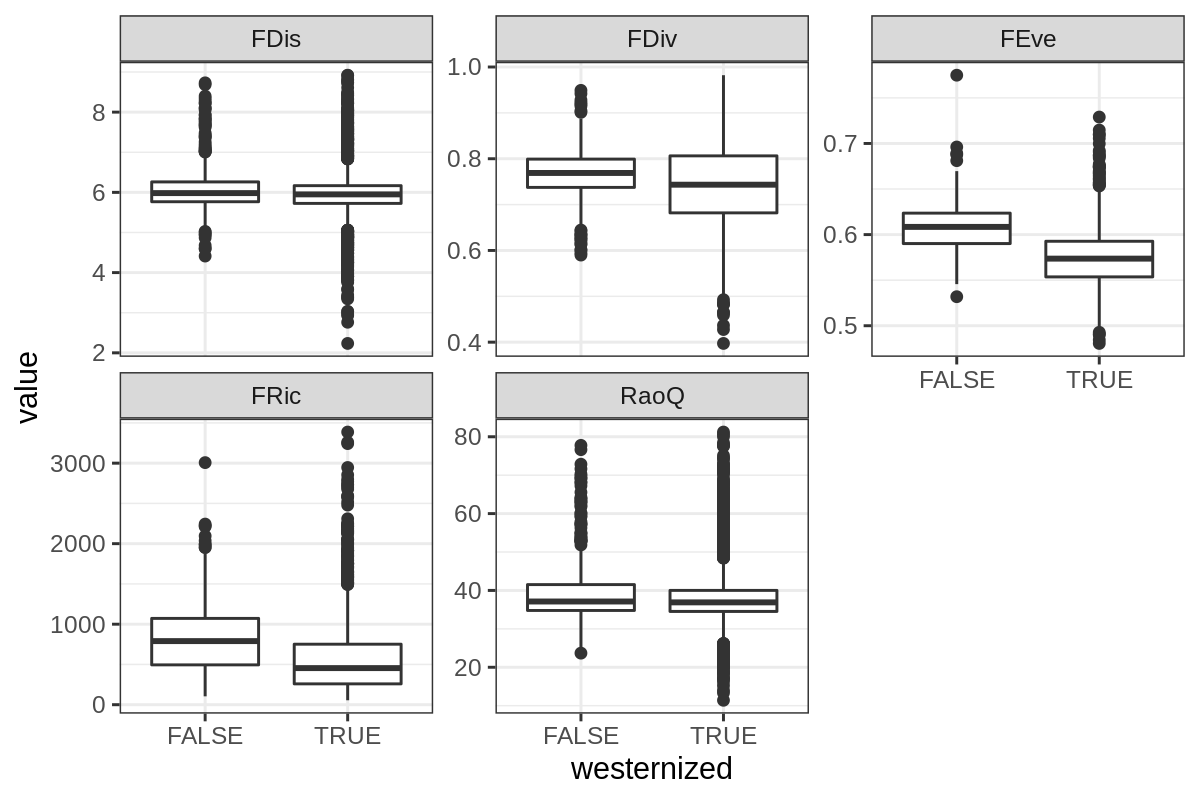

In [45]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(westernized, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()

p.dims(6,4)
plot(p)

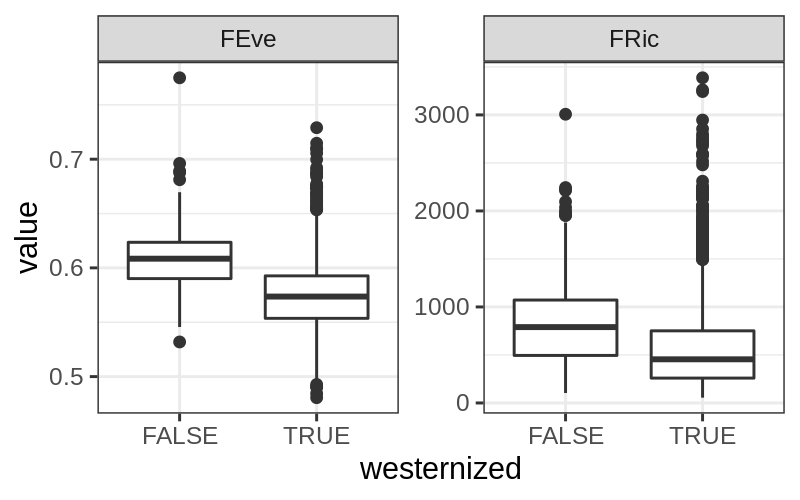

In [46]:
# plotting
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    ggplot(aes(westernized, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()

p.dims(4,2.5)
plot(p)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 6005 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6005 rows containing missing values (geom_point).”


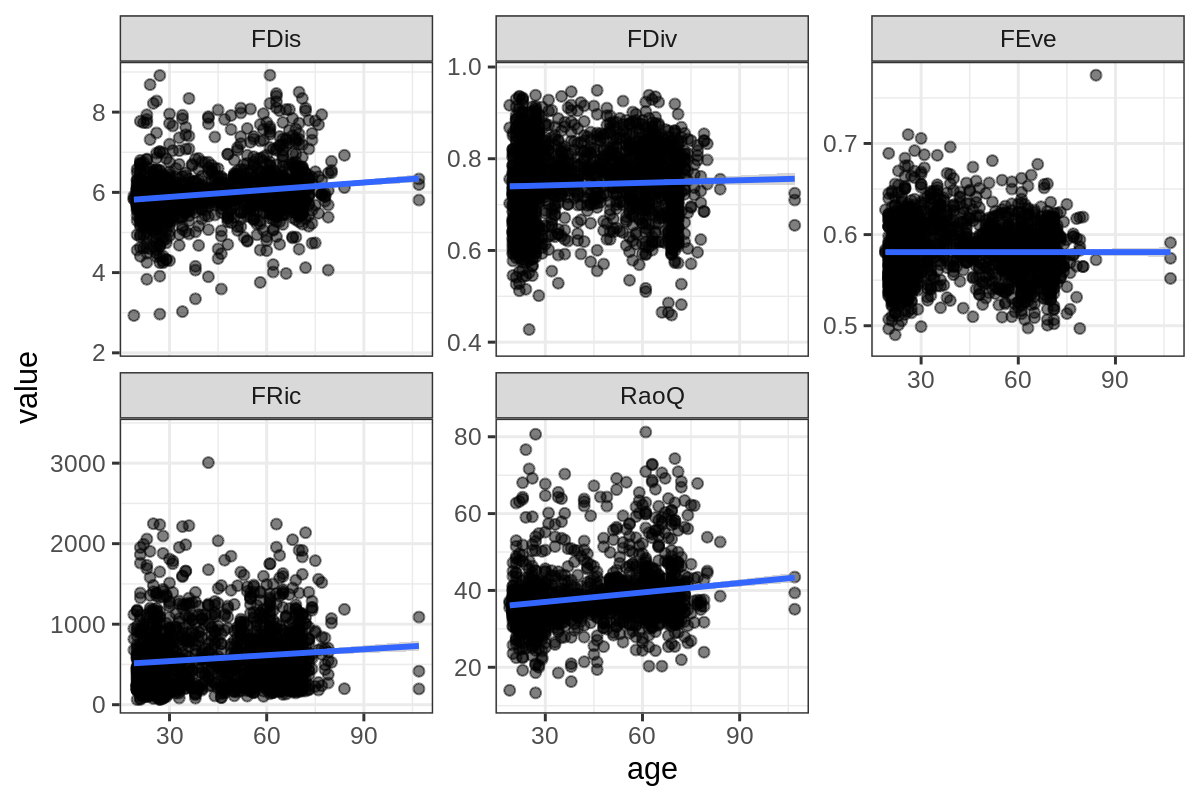

In [47]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(age, value)) +
    geom_point(alpha=0.5) +
    geom_smooth(method='lm') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(6,4)
plot(p)

`geom_smooth()` using formula 'y ~ x'



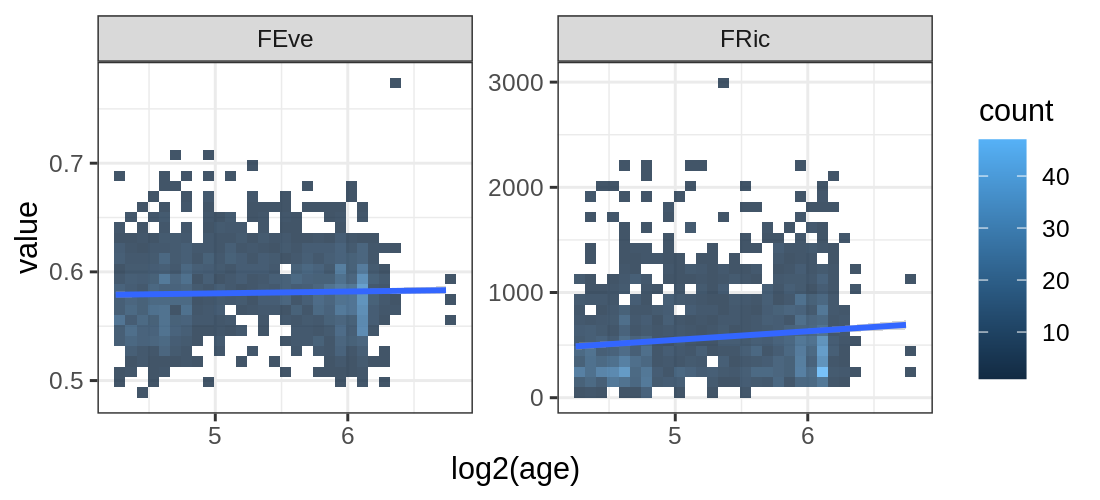

In [49]:
# plotting
p = FD_res_df_f %>%
    filter(!is.na(age)) %>%
    mutate(age = log2(age)) %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    ggplot(aes(age, value)) +
    geom_bin2d(alpha=0.8) +
    geom_smooth(method='lm') +
    labs(x='log2(age)') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()

p.dims(5.5,2.5)
plot(p)

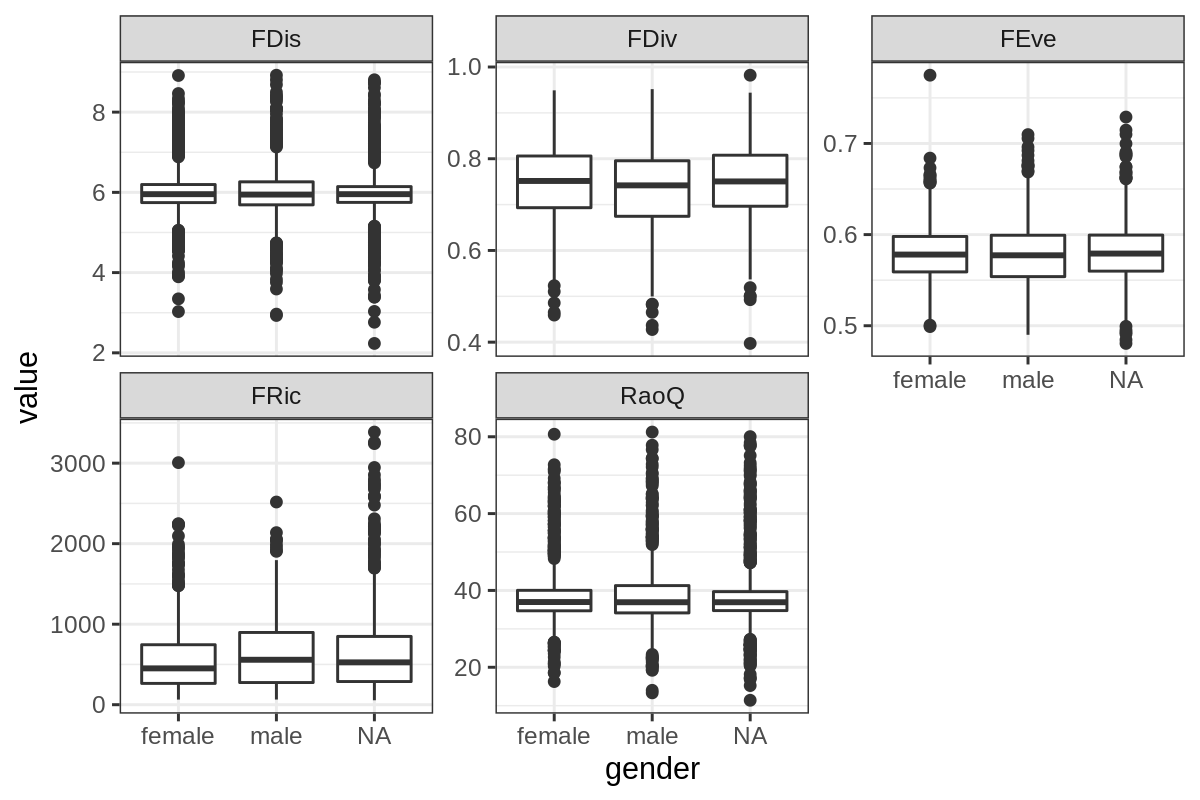

In [50]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(gender, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(6,4)
plot(p)

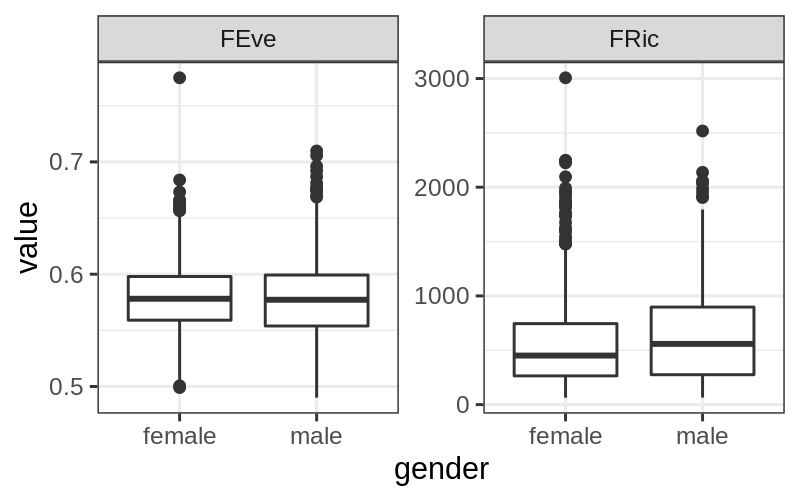

In [51]:
# plotting
p = FD_res_df_f %>%
    filter(!is.na(gender)) %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    ggplot(aes(gender, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(4,2.5)
plot(p)

Warning message:
“Removed 9435 rows containing missing values (geom_point).”


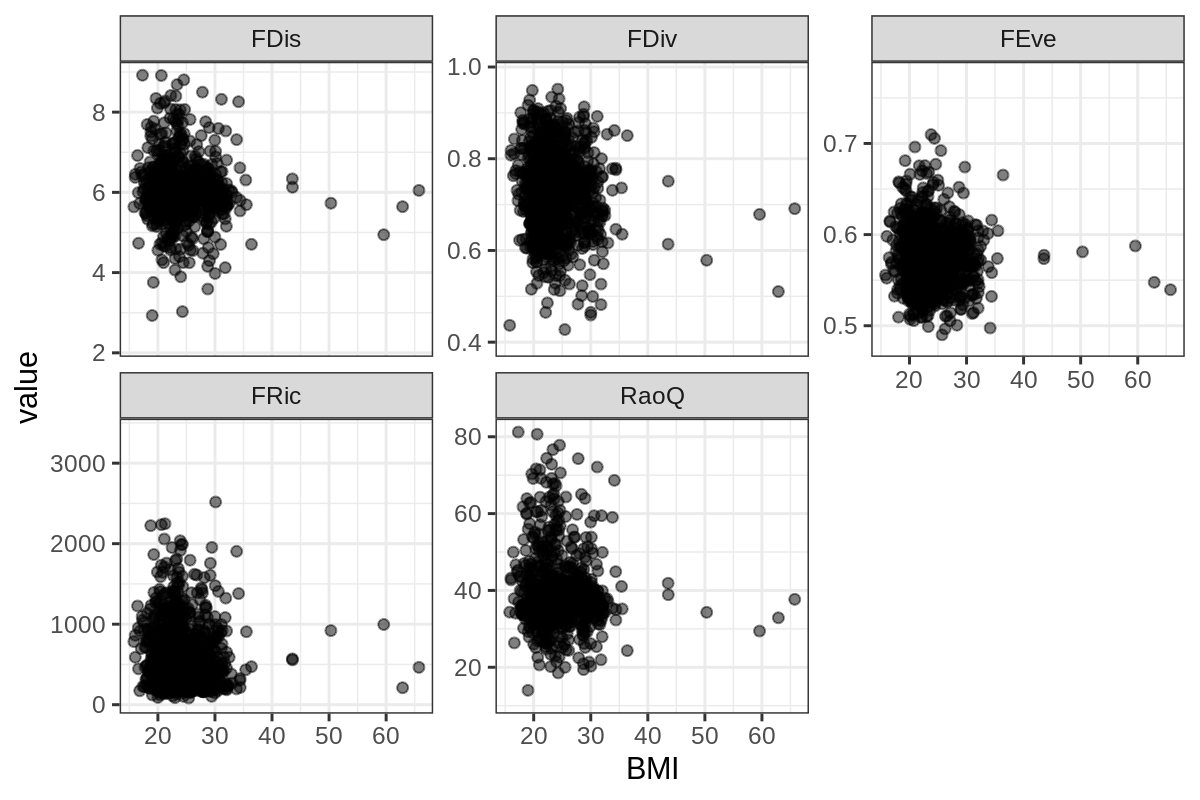

In [52]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(BMI, value)) +
    geom_point(alpha=0.5) +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(6,4)
plot(p)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 3774 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3774 rows containing missing values (geom_point).”


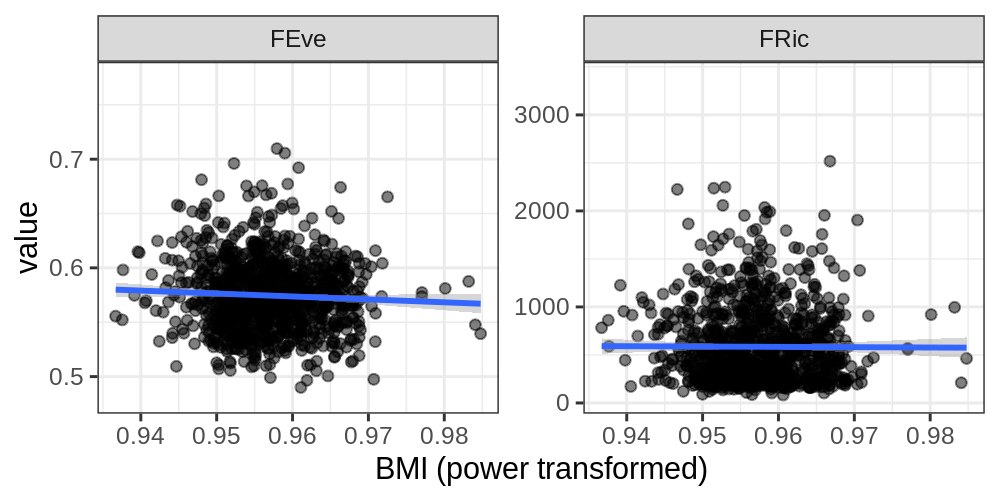

In [54]:
# plotting
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    mutate(BMI = car::bcPower(BMI, -1)) %>%
    ggplot(aes(BMI, value)) +
    geom_point(alpha=0.5) +
    geom_smooth(method='lm') +
    labs(x='BMI (power transformed)') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(5,2.5)
plot(p)

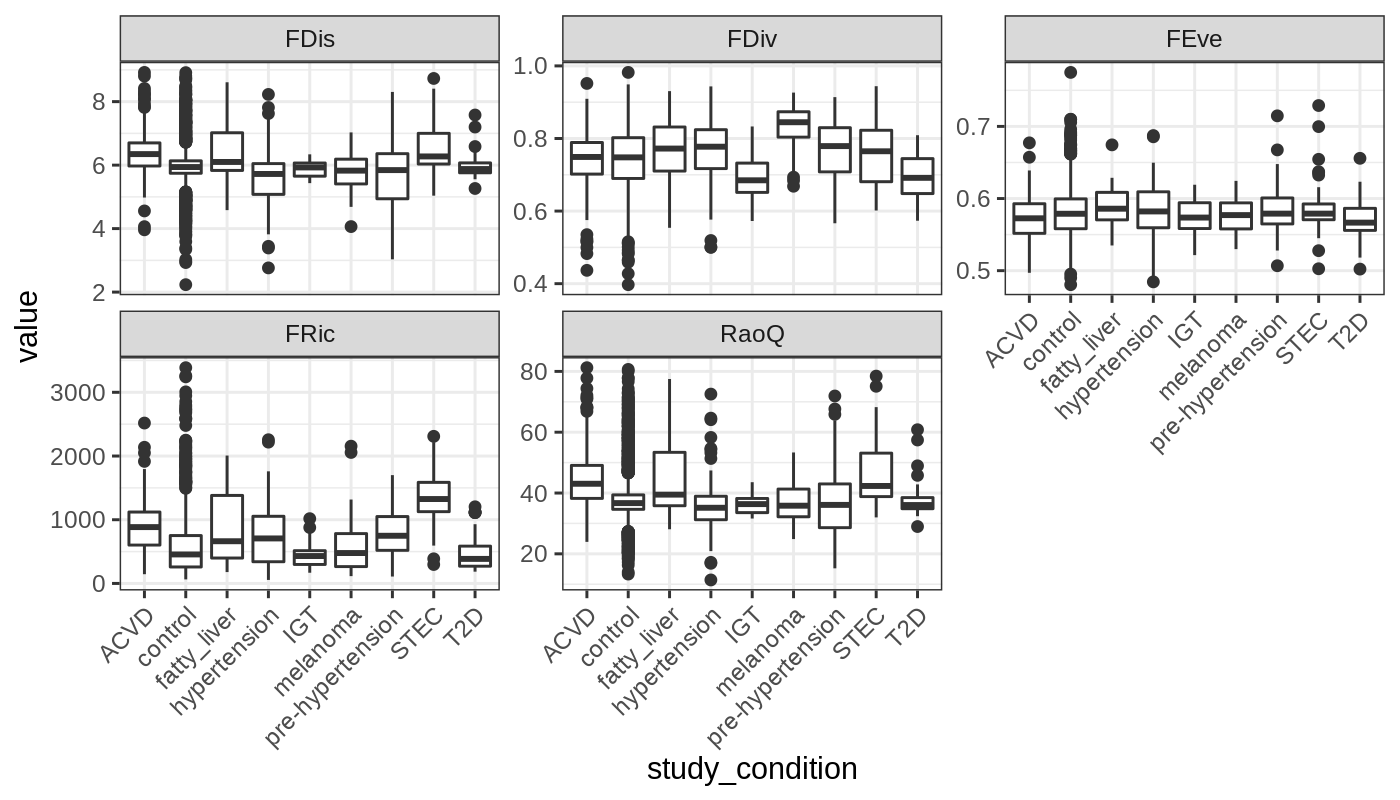

In [55]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(study_condition, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(7,4)
plot(p)

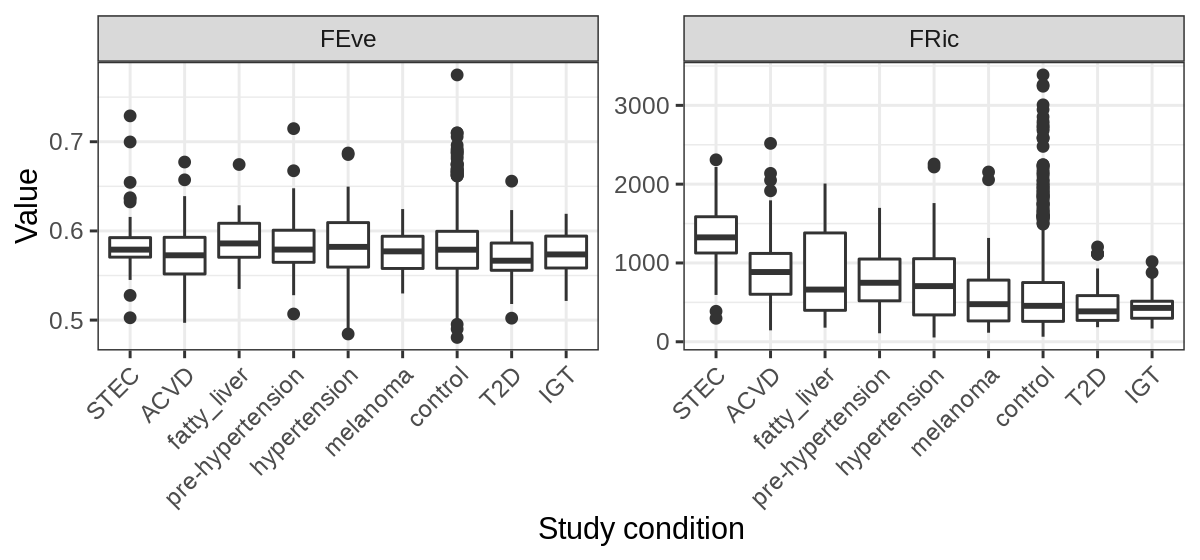

In [56]:
# plotting
func = function(x) mean(-x)
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    mutate(study_condition = study_condition %>% reorder(value, func)) %>%
    ggplot(aes(study_condition, value)) +
    geom_boxplot() +
    labs(x='Study condition', y='Value') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(6,2.8)
plot(p)

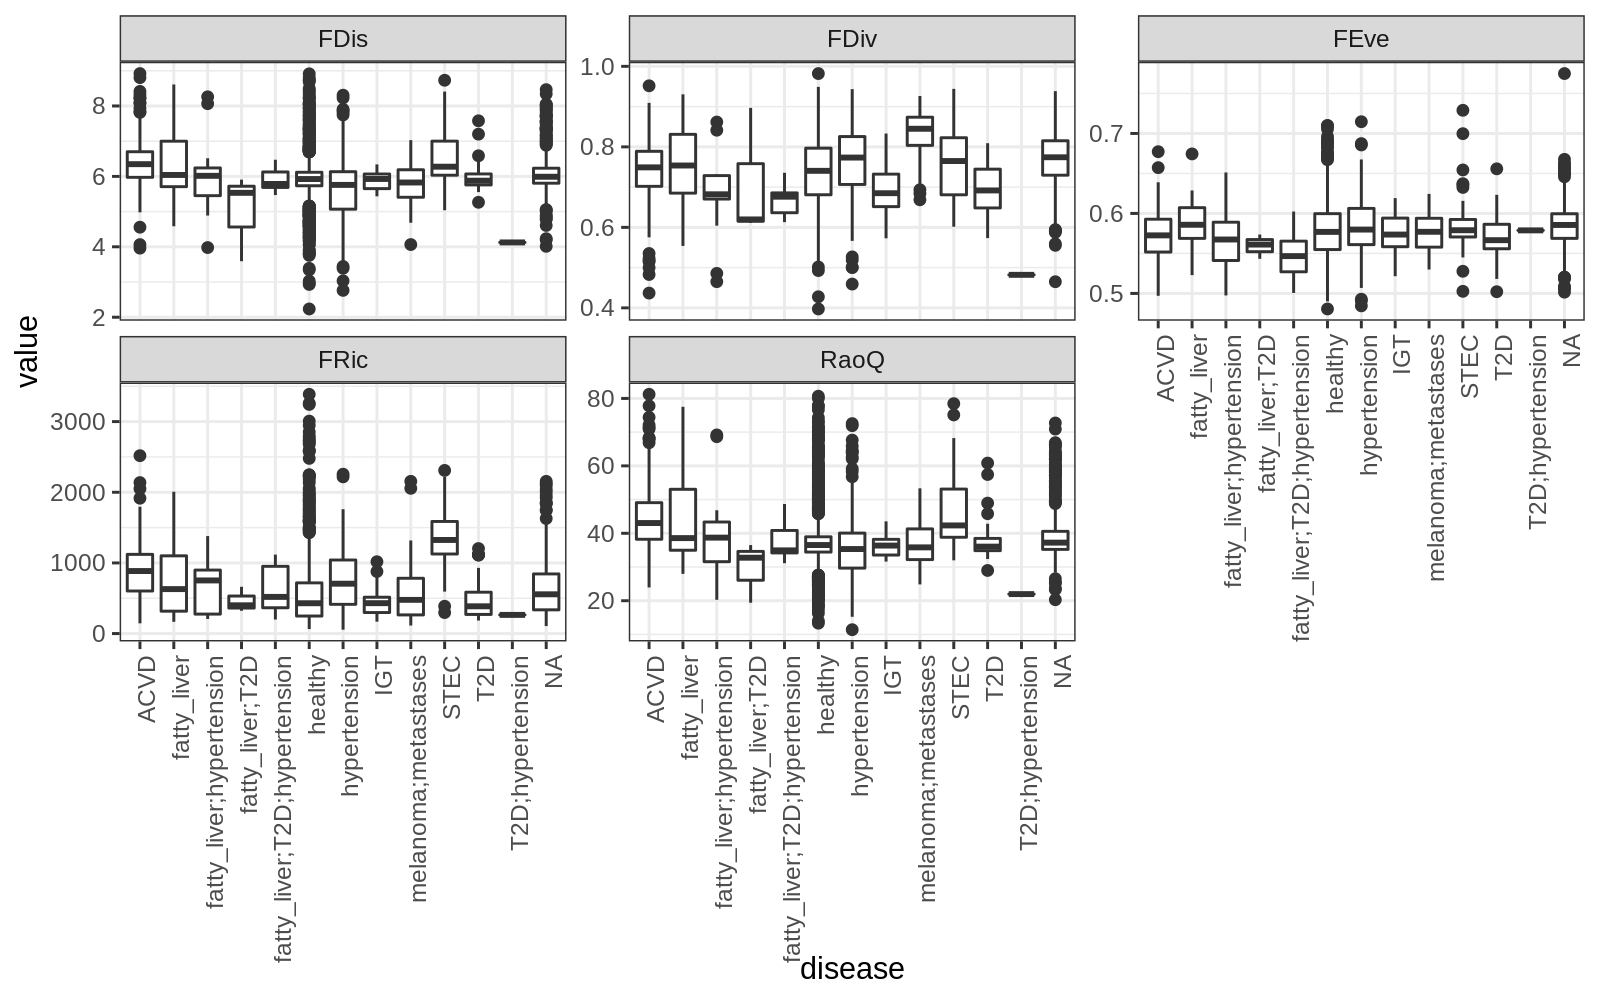

In [57]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.9)
    )
p.dims(8,5)
plot(p)

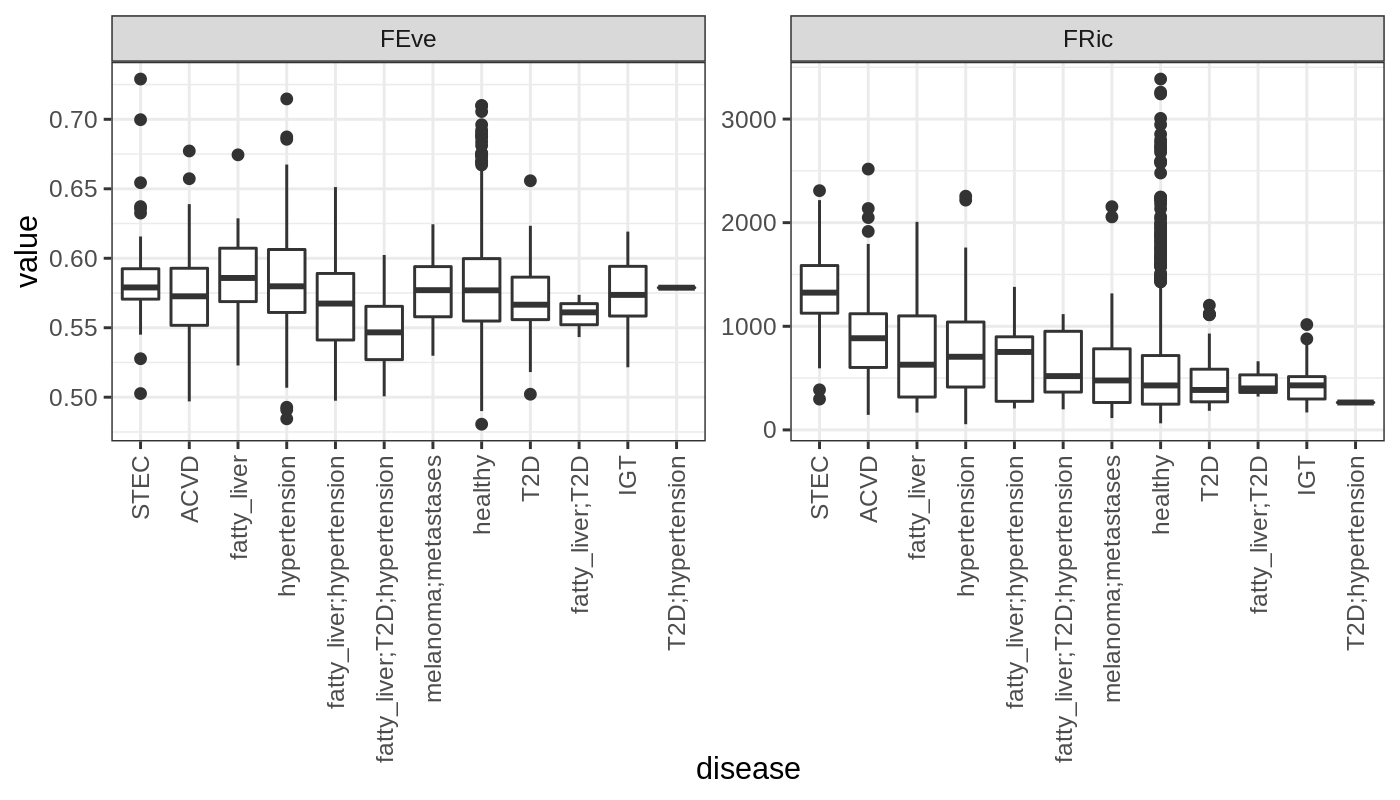

In [58]:
# plotting
func = function(x) mean(-x)
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    filter(!is.na(disease)) %>%
    mutate(disease = disease %>% reorder(value, func)) %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.dims(7,4)
plot(p)

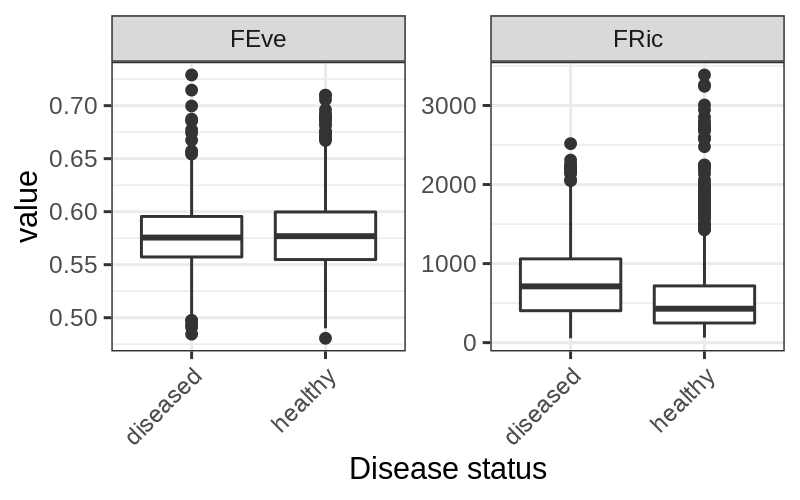

In [60]:
# plotting
func = function(x) mean(-x)
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    filter(!is.na(disease)) %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    mutate(disease = disease %>% reorder(value, func)) %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    labs(x='Disease status') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(4,2.5)
plot(p)

In [62]:
# calculating effect size
cohen_d = function(df){
    res = effsize::cohen.d(scales::rescale(df$value), 
                           df$disease)

    res = data.frame(estimate = res$estimate,
                     ci_lower = res$conf.int[1],
                     ci_upper = res$conf.int[2],
                     measure = df$measure[1],
                     n = nrow(df))
    return(res)
}

cd_res = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    filter(!is.na(disease)) %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease),
           disease = disease %>% factor(levels=c('healthy', 'diseased'))) %>%
    arrange(disease) %>%
    group_split(measure) %>%
    lapply(cohen_d) %>%
    rbindlist(use.names=TRUE) 
cd_res

estimate,ci_lower,ci_upper,measure,n
<dbl>,<dbl>,<dbl>,<chr>,<int>
0.07403517,-0.01615849,0.1642288,FEve,2418
-0.51567147,-0.60700591,-0.4243370,FRic,2418


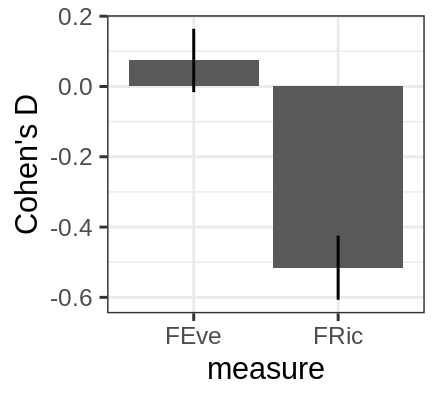

In [64]:
# plotting
p = cd_res %>%
    ggplot(aes(measure, estimate)) +
    geom_bar(stat='identity') +
    geom_linerange(aes(ymin=ci_lower,
                       ymax=ci_upper)) +
    labs(y='Cohen\'s D') +
    theme_bw()
p.dims(2.2,2)
plot(p)

### Mixed effects models

* How does function vary with host phenotype (random effect = study)?

In [66]:
library(lme4)
library(lmerTest)


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [67]:
lmer_res = list()

#### Full dataset

In [68]:
fm = FD_res_df_f %>%
    filter(measure == 'FRic') %>%
    lmer(value ~ westernized + (1 | dataset_name), data=.)

summary(fm)
lmer_res[['full_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + (1 | dataset_name)
   Data: .

REML criterion at convergence: 43022.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7380 -0.5962 -0.1902  0.4594  6.0766 

Random effects:
 Groups       Name        Variance Std.Dev.
 dataset_name (Intercept) 119558   345.8   
 Residual                 126333   355.4   
Number of obs: 2943, groups:  dataset_name, 30

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)       700.90      76.60   52.54   9.150 1.86e-12 ***
westernizedTRUE   -42.64      56.98 1083.25  -0.748    0.454    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
wstrnzdTRUE -0.552

In [69]:
fm = FD_res_df_f %>%
    filter(measure == 'FEve') %>%
    lmer(value ~ westernized + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['full_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + (1 | dataset_name)
   Data: .

REML criterion at convergence: -12648.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2268 -0.6274 -0.0295  0.5871  6.5052 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0001397 0.01182 
 Residual                 0.0007713 0.02777 
Number of obs: 2943, groups:  dataset_name, 30

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       0.600108   0.003532  58.044957 169.904  < 2e-16 ***
westernizedTRUE  -0.017698   0.003614 136.836600  -4.897  2.7e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
wstrnzdTRUE -0.763

#### Westernized + gender

In [70]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           measure == 'FRic') %>%
    lmer(value ~ westernized + gender + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + (1 | dataset_name)
   Data: .

REML criterion at convergence: 26359.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8172 -0.5623 -0.1902  0.4490  6.5870 

Random effects:
 Groups       Name        Variance Std.Dev.
 dataset_name (Intercept)  34686   186.2   
 Residual                 108469   329.3   
Number of obs: 1825, groups:  dataset_name, 16

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)       777.65      81.21   25.05   9.576 7.47e-10 ***
westernizedTRUE  -270.64      88.81   35.30  -3.047  0.00435 ** 
gendermale         23.74      17.75 1821.55   1.337  0.18128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE
wstrnzdTRUE -0.803       
gendermale  -0.069 -0.032

In [71]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           measure == 'FEve') %>%
    lmer(value ~ westernized + gender + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + (1 | dataset_name)
   Data: .

REML criterion at convergence: -8011.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9512 -0.6303 -0.0078  0.5781  6.8388 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0001453 0.01205 
 Residual                 0.0006980 0.02642 
Number of obs: 1825, groups:  dataset_name, 16

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      6.034e-01  5.584e-03  2.416e+01 108.052  < 2e-16 ***
westernizedTRUE -2.528e-02  6.225e-03  2.933e+01  -4.061 0.000334 ***
gendermale       4.652e-04  1.422e-03  1.822e+03   0.327 0.743573    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE
wstrnzdTRUE -0.820       
gendermale  -0.089 -0.025

#### westernized + gender + age

In [72]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           measure == 'FRic') %>%
    mutate(age = log2(age)) %>%
    lmer(value ~ westernized + gender + age + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + (1 | dataset_name)
   Data: .

REML criterion at convergence: 23900.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8067 -0.5544 -0.2010  0.4407  6.5929 

Random effects:
 Groups       Name        Variance Std.Dev.
 dataset_name (Intercept)  34130   184.7   
 Residual                 107897   328.5   
Number of obs: 1656, groups:  dataset_name, 16

Fixed effects:
                Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)      791.380    137.676  149.128   5.748 4.92e-08 ***
westernizedTRUE -271.004     88.481   34.526  -3.063  0.00423 ** 
gendermale        13.368     18.811 1651.907   0.711  0.47742    
age               -1.977     21.000 1377.004  -0.094  0.92503    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE gndrml
wstrnzdTRUE -0.472     

In [73]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           measure == 'FEve') %>%
    mutate(age = log2(age)) %>%
    lmer(value ~ westernized + gender + age + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + (1 | dataset_name)
   Data: .

REML criterion at convergence: -7252.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9443 -0.6484 -0.0014  0.5715  6.6538 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0001706 0.01306 
 Residual                 0.0006986 0.02643 
Number of obs: 1656, groups:  dataset_name, 16

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      5.811e-01  1.069e-02  1.667e+02  54.332  < 2e-16 ***
westernizedTRUE -2.504e-02  6.577e-03  3.110e+01  -3.808 0.000619 ***
gendermale      -4.830e-05  1.512e-03  1.652e+03  -0.032 0.974519    
age              4.225e-03  1.679e-03  1.246e+03   2.517 0.011964 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE gndrml


#### westernized + gender + age + bmi

In [74]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(BMI),
           measure == 'FRic') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + BMI + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-b_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + BMI + (1 | dataset_name)
   Data: .

REML criterion at convergence: 12769.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0109 -0.5538 -0.1775  0.4558  4.6358 

Random effects:
 Groups       Name        Variance Std.Dev.
 dataset_name (Intercept) 46521    215.7   
 Residual                 96427    310.5   
Number of obs: 894, groups:  dataset_name, 10

Fixed effects:
                Estimate Std. Error       df t value Pr(>|t|)  
(Intercept)     -2755.68    1764.23   888.51  -1.562   0.1186  
westernizedTRUE  -220.56     117.58    45.86  -1.876   0.0671 .
gendermale         29.21      21.25   884.34   1.374   0.1698  
age               -24.19      24.32   870.54  -0.995   0.3201  
BMI              3782.39    1853.58   888.06   2.041   0.0416 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effect

In [75]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(BMI),
           measure == 'FEve') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + BMI + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-b_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + BMI + (1 | dataset_name)
   Data: .

REML criterion at convergence: -3870.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8760 -0.6539 -0.0362  0.5805  3.9839 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0002428 0.01558 
 Residual                 0.0007185 0.02681 
Number of obs: 894, groups:  dataset_name, 10

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       0.664782   0.151969 887.282536   4.374 1.36e-05 ***
westernizedTRUE  -0.023536   0.009378  33.567530  -2.510   0.0171 *  
gendermale        0.001020   0.001834 885.191042   0.556   0.5783    
age               0.004678   0.002089 841.416497   2.239   0.0254 *  
BMI              -0.091719   0.159813 888.894145  -0.574   0.5662    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

#### westernized + gender + age + disease

In [76]:
fm = FD_res_df_f %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(disease),
           measure == 'FRic') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + disease + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-d_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + disease + (1 | dataset_name)
   Data: .

REML criterion at convergence: 18516

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9209 -0.5283 -0.1841  0.4541  6.9544 

Random effects:
 Groups       Name        Variance Std.Dev.
 dataset_name (Intercept) 45613    213.6   
 Residual                 96215    310.2   
Number of obs: 1294, groups:  dataset_name, 14

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)      1098.07     154.67  160.59   7.099 3.82e-11 ***
westernizedTRUE  -251.77      99.53   52.25  -2.530   0.0145 *  
gendermale        -13.41      18.60 1288.78  -0.721   0.4711    
age               -11.38      21.55 1202.62  -0.528   0.5976    
diseasehealthy   -335.78      42.64  958.93  -7.875 9.22e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fix

In [77]:
fm = FD_res_df_f %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(disease),
           measure == 'FEve') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + disease + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-d_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + disease + (1 | dataset_name)
   Data: .

REML criterion at convergence: -5619.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8962 -0.6574 -0.0219  0.5717  4.0786 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0001840 0.01357 
 Residual                 0.0007142 0.02673 
Number of obs: 1294, groups:  dataset_name, 14

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      5.841e-01  1.242e-02  2.044e+02  47.018  < 2e-16 ***
westernizedTRUE -2.726e-02  7.341e-03  3.156e+01  -3.713  0.00079 ***
gendermale       4.099e-04  1.598e-03  1.287e+03   0.256  0.79761    
age              3.978e-03  1.833e-03  1.032e+03   2.171  0.03019 *  
diseasehealthy   3.028e-04  3.586e-03  6.368e+02   0.084  0.93275    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

#### Summary: w/ BMI

In [78]:
lmer_res %>%
    lapply(function(x) tibble::rownames_to_column(x, 'variable')) %>%
    data.table::rbindlist(use.names=TRUE, idcol='hypothesis') %>%
    separate(hypothesis, c('dataset', 'metric'), sep='_') %>%
    rename('P' = `Pr(>F)`) 

dataset,metric,variable,Sum Sq,Mean Sq,NumDF,DenDF,F value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
full,FRic,westernized,7.076156e+04,7.076156e+04,1,1083.2515,0.5601202,4.543743e-01
full,FEve,westernized,1.849523e-02,1.849523e-02,1,136.8366,23.9799391,2.703282e-06
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
w-g-a-d,FEve,age,3.365029e-03,3.365029e-03,1,1032.2453,4.711282251,0.03019268
w-g-a-d,FEve,disease,5.090602e-06,5.090602e-06,1,636.8093,0.007127209,0.93274681


In [79]:
# to data.frame
lmer_res_f = lmer_res %>%
    lapply(function(x) tibble::rownames_to_column(x, 'variable')) %>%
    data.table::rbindlist(use.names=TRUE, idcol='hypothesis') %>%
    separate(hypothesis, c('dataset', 'metric'), sep='_') %>%
    rename('P' = `Pr(>F)`) %>%
    filter(dataset != 'w-g',
           dataset != 'w-g-a-d') %>%
    mutate(dataset = case_when(dataset == 'full' ~ '~ westernized +\n(1 | dataset)',
                               dataset == 'w-g-a' ~ '~ westernized +\nage + gender + (1 | dataset)',
                               dataset == 'w-g-a-b' ~ '~ westernized +\nage+ gender + BMI + (1 | dataset)')) %>%
    group_by(dataset, variable) %>%
    mutate(q_val = p.adjust(as.Num(P), method='BH'),
           .groups='drop')
lmer_res_f

dataset,metric,variable,Sum Sq,Mean Sq,NumDF,DenDF,F value,P,q_val,.groups
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
~ westernized + (1 | dataset),FRic,westernized,7.076156e+04,7.076156e+04,1,1083.2515,0.5601202,4.543743e-01,4.543743e-01,drop
~ westernized + (1 | dataset),FEve,westernized,1.849523e-02,1.849523e-02,1,136.8366,23.9799391,2.703282e-06,5.406565e-06,drop
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
~ westernized + age+ gender + BMI + (1 | dataset),FEve,age,0.0036014038,0.0036014038,1,841.4165,5.0121417,0.02543086,0.05086172,drop
~ westernized + age+ gender + BMI + (1 | dataset),FEve,BMI,0.0002366673,0.0002366673,1,888.8941,0.3293744,0.56617290,0.56617290,drop


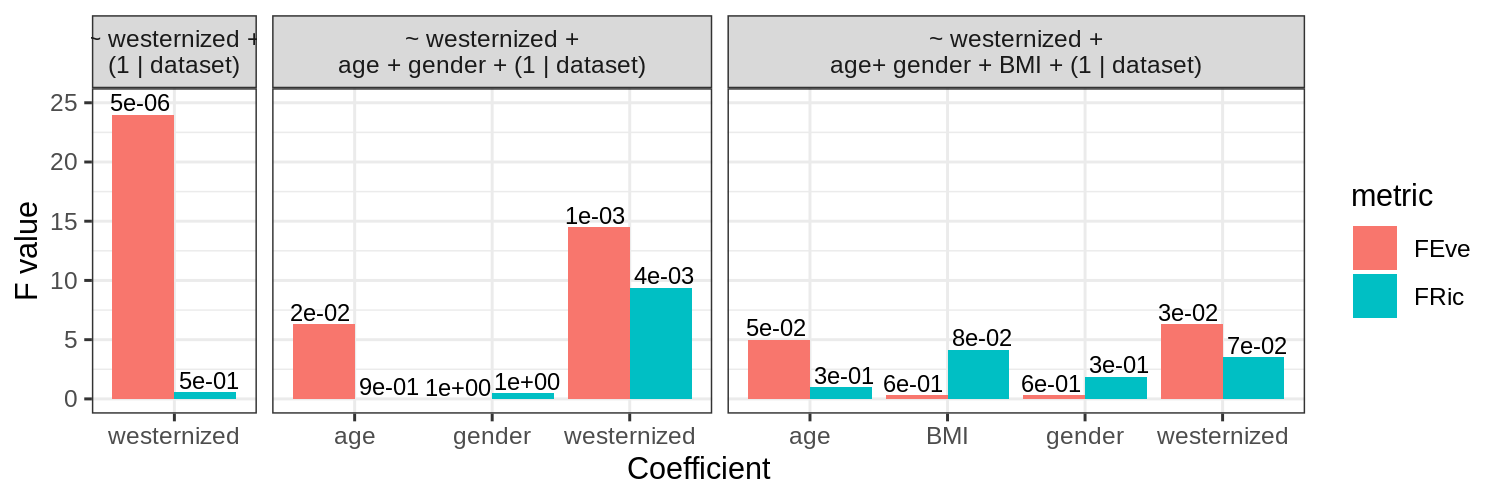

In [80]:
# plotting
p = lmer_res_f %>%
    mutate(q_val = formatC(q_val, format = "e", digits = 0)) %>%
    ggplot(aes(variable, `F value`, fill=metric)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y = `F value` + 1, label=q_val), 
              position = position_dodge(width = 1),
              size=3) +
    facet_grid(. ~ dataset, scales='free_x', space='free_x') +
    labs(x='Coefficient') +
    theme_bw() 

p.dims(7.5,2.5)
plot(p)

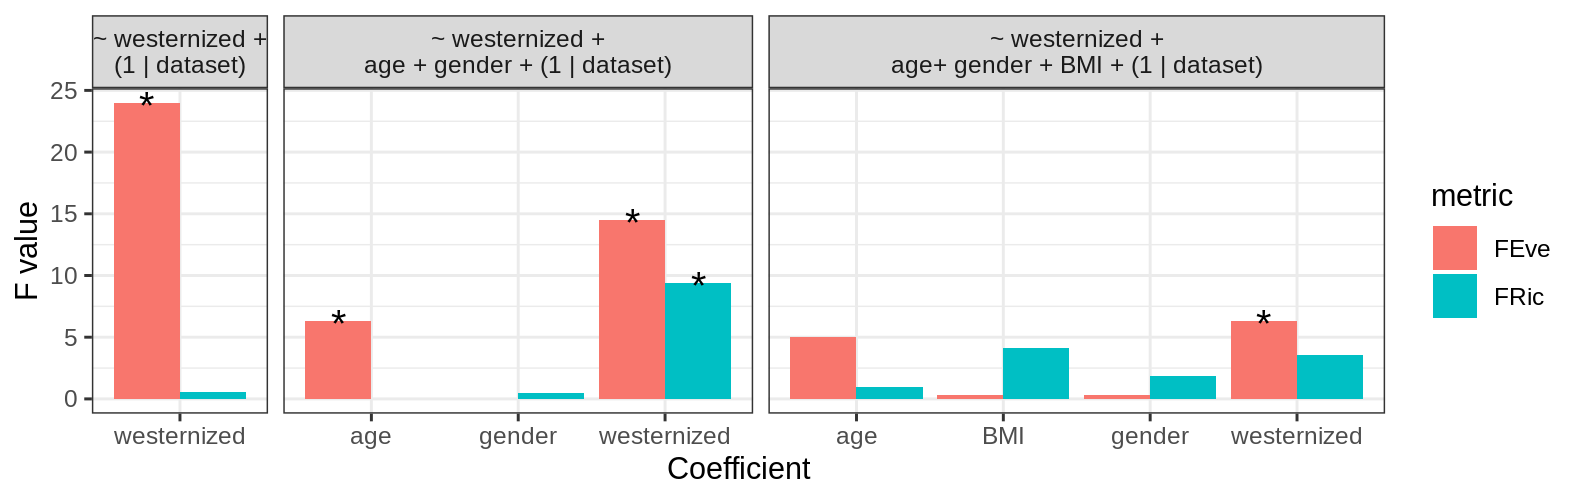

In [81]:
# plotting
p = lmer_res_f %>%
    mutate(sig = ifelse(q_val < 0.05, '*', '')) %>%
    ggplot(aes(variable, `F value`, fill=metric)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=sig), size=5, vjust=0.6,
                  position=position_dodge(width=0.9)) +
    facet_grid(. ~ dataset, scales='free_x', space='free_x') +
    labs(x='Coefficient') +
    theme_bw() 

p.dims(7.9,2.5)
plot(p)

#### Summary: w/ disease

In [82]:
# to data.frame
lmer_res_f = lmer_res %>%
    lapply(function(x) tibble::rownames_to_column(x, 'variable')) %>%
    data.table::rbindlist(use.names=TRUE, idcol='hypothesis') %>%
    separate(hypothesis, c('dataset', 'metric'), sep='_') %>%
    rename('P' = `Pr(>F)`) %>%
    filter(dataset != 'w-g',
           dataset != 'w-g-a-b') %>%
    mutate(dataset = case_when(dataset == 'full' ~ 'measure ~\nwesternized +\n(1 | dataset)',
                               dataset == 'w-g-a' ~ 'measure ~ westernized +\nage + gender + (1 | dataset)',
                               dataset == 'w-g-a-d' ~ 'measure ~ westernized +\nage+ gender + disease + (1 | dataset)')) %>%
    group_by(dataset, variable) %>%
    mutate(q_val = p.adjust(as.Num(P), method='BH'),
           .groups='drop')
lmer_res_f

dataset,metric,variable,Sum Sq,Mean Sq,NumDF,DenDF,F value,P,q_val,.groups
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
measure ~ westernized + (1 | dataset),FRic,westernized,7.076156e+04,7.076156e+04,1,1083.2515,0.5601202,4.543743e-01,4.543743e-01,drop
measure ~ westernized + (1 | dataset),FEve,westernized,1.849523e-02,1.849523e-02,1,136.8366,23.9799391,2.703282e-06,5.406565e-06,drop
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
measure ~ westernized + age+ gender + disease + (1 | dataset),FEve,age,3.365029e-03,3.365029e-03,1,1032.2453,4.711282251,0.03019268,0.06038536,drop
measure ~ westernized + age+ gender + disease + (1 | dataset),FEve,disease,5.090602e-06,5.090602e-06,1,636.8093,0.007127209,0.93274681,0.93274681,drop


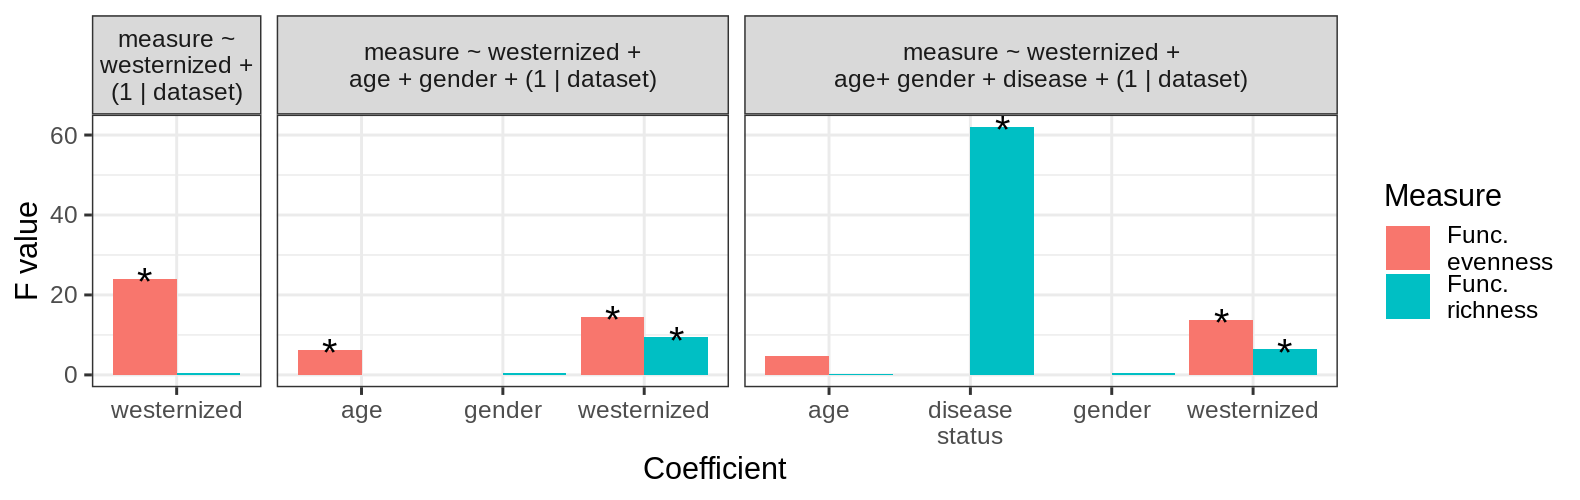

In [83]:
# plotting
p = lmer_res_f %>%
    mutate(metric = ifelse(metric == 'FEve', 'Func.\nevenness', 'Func.\nrichness')) %>%
    mutate(variable = ifelse(variable == 'disease', 'disease\nstatus', variable)) %>%
    mutate(sig = ifelse(q_val < 0.05, '*', '')) %>%
    ggplot(aes(variable, `F value`, fill=metric)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=sig), size=5, vjust=0.6,
                  position=position_dodge(width=0.9)) +
    scale_fill_discrete('Measure') +
    facet_grid(. ~ dataset, scales='free_x', space='free_x') +
    labs(x='Coefficient') +
    theme_bw() 

p.dims(7.9,2.5)
plot(p)

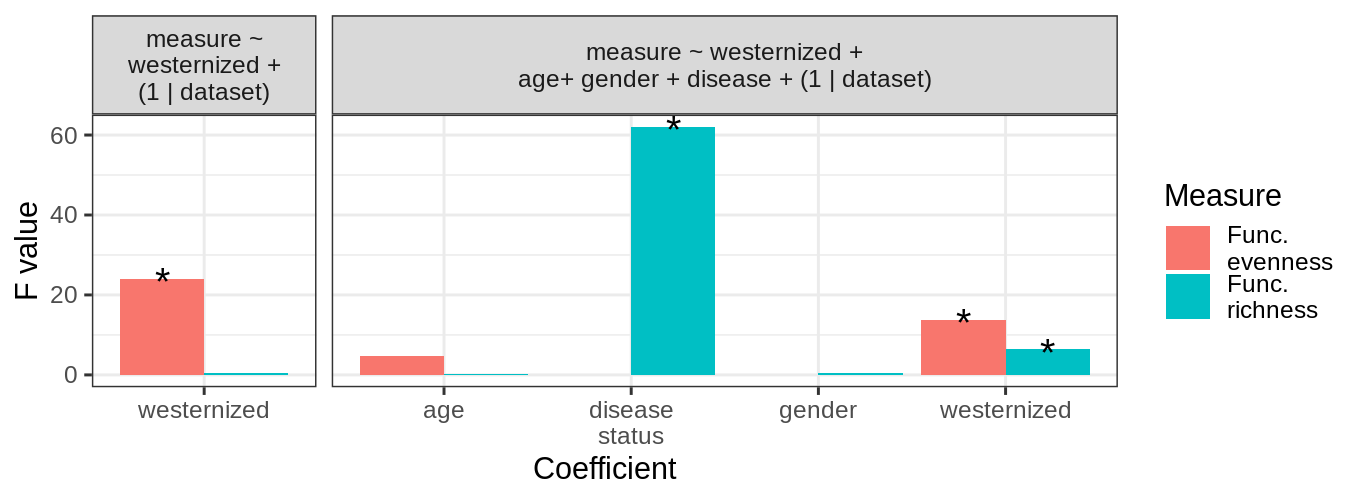

In [84]:
# plotting
p = lmer_res_f %>%
    filter(dataset != 'measure ~ westernized +\nage + gender + (1 | dataset)') %>%
    mutate(metric = ifelse(metric == 'FEve', 'Func.\nevenness', 'Func.\nrichness')) %>%
    mutate(variable = ifelse(variable == 'disease', 'disease\nstatus', variable)) %>%
    mutate(sig = ifelse(q_val < 0.05, '*', '')) %>%
    ggplot(aes(variable, `F value`, fill=metric)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=sig), size=5, vjust=0.6,
                  position=position_dodge(width=0.9)) +
    scale_fill_discrete('Measure') +
    facet_grid(. ~ dataset, scales='free_x', space='free_x') +
    labs(x='Coefficient') +
    theme_bw() 

p.dims(6.8,2.5)
plot(p)

## All traits

In [85]:
# # FD
# ## WARNING: SLOW
# FD_res = dbFD(trt, m, corr="cailliez", calc.CWM=FALSE)
# FD_res %>% names

### Saving

In [86]:
# # saving: outfile
# outfile = file.path(work_dir, 'Traitar_FD_all-trt.RDS')
# outfile

In [87]:
# # saving: save
# saveRDS(FD_res, outfile)
# cat('File written:', outfile, '\n')

In [88]:
# # saving: re-loading
# FD_res = readRDS(outfile)
# FD_res %>% names

# sessionInfo

In [89]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lmerTest_3.1-3    lme4_1.1-27.1     Matrix_1.3-4      LeyLabRMisc_0.2.0
 [5] FD_1.0-12         vegan_2.5-7       lattice_0.20-45   permute_0.9-5    
 [9] geometry_0.4.5    ade4_1.7-17       ape_5.5           tidytable_0.6.5  
[13] data.table_1.14.0 ggplot2_3.3.5     tidyr